자세한 내용과 수식은 책에 나와있음. 책 만세~

## 7.2 정규화와 Ridge, Lasso regression
### 7.2.1 정규화
- 파라미터 추정시 손실함수의 계수가 큰 값이 되는 것에 벌칙항을 도입 하는 기법
- 벌칙항은 정규화항이라고도 한다.
- 통계학에서는 파라미터의 **축소추정**이라한다.

### 7.2.2 Ridge(L$_{2}$) regression
- 정규화항으로 계수의 제곱합을 이용한 모델
- 정규선형모델을 대상으로 하나 로지스틱회귀 등에서도 확장 가능
- 잔차제곱합을 작게 하고 싶지만 벌칙은 받고 싶지 않다.\
  그래서 절대치가 작은 계수가 추정된다. 이것이 축소추정이라 불리는 이유이다.

### 7.2.3 Lasso(L$_{1}$) regression
- 정규화항으로 계수의 절대값의 합을 이용한 회귀모델

### 7.2.3 정규화 강도를 지정하는 파라미터의 결정
- 수식의 $\alpha$를 결정하는 방법 설명.

### 7.2.5 독립변수의 표준화
- 리지나 라소 회귀 실행전 독립변수를 평균 0, 표준편차 1로 표준화(Standardization)한다. 

### 7.2.6 리지 회귀와 라소 회귀의 추정 결과 차이
- 리지 회귀는 전체적으로 절대값이 작은 계수가 추정되는 경향이 있다.
- 라쏘 회귀는 소수의 계수만 0이 아닌 값이 되고, 그외는 모두 0이 되는 결과가 되기 쉽다.

### 7.2.7 변수 선택과 정규화의 비교

### 7.2.8 정규화의 의의
- 과학습 억제

## 7.3 파이썬을 이용한 리지 회귀와 라소 회귀

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

In [2]:
X = pd.read_csv('../input/lm-model/7-3-1-large-data.csv')
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098
3,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,...,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097
4,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,0.0714,...,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097,0.0096


### 7.3.3 표준화(Standardization) 평균 0, 표준편차 1

In [3]:
# column 별로 평균 구하기
np.mean(X, axis=0).head()

X_1    0.037272
X_2    0.030649
X_3    0.027360
X_4    0.025181
X_5    0.023558
dtype: float64

In [4]:
# 단순하게 표준화하기
X -= np.mean(X, axis=0)
X /= np.std(X, ddof=1, axis=0)

# 표준화되었는지 확인.
print('평균 : \n', np.mean(X, axis=0).round(3).head())
print('표준편차 : \n', np.std(X, ddof=1, axis=0).head())

평균 : 
 X_1   -0.0
X_2   -0.0
X_3    0.0
X_4   -0.0
X_5    0.0
dtype: float64
표준편차 : 
 X_1    1.0
X_2    1.0
X_3    1.0
X_4    1.0
X_5    1.0
dtype: float64


### 7.3.4 시뮬레이션으로 종속변수 만들기
데이터에 종속변수가 없으므로 만들어야한다.

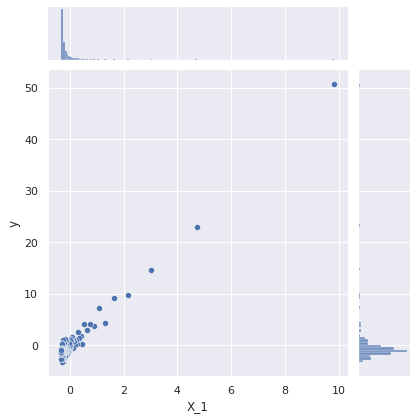

In [5]:
# 정규분포를 따르는 노이즈
np.random.seed(1)
noise = sp.stats.norm.rvs(loc=0, scale=1, size=X.shape[0])

# 올바른 계수를 5라고 설정하여 종속변수 작성
y = X.X_1 * 5 + noise

# 종속변수와 X_1의 관계 그래프그리기
# 종속변수와 독립변수 합치기
large_data = pd.concat([pd.DataFrame({'y':y}), X], axis=1)

# 그래프 그리기
sns.jointplot(y='y', x='X_1', data=large_data);

### 7.3.5 일반적인 최소제곱법 적용하기

In [6]:
# 독립변수가 100개 이르모 한방에 몰아 넣기.
lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head()

X_1     14.755018
X_2    -87.462851
X_3    211.743136
X_4    -94.153420
X_5    -68.174976
dtype: float64

### 7.3.6 sklearn을 이용한 선형회귀
내용이 좀있음.

In [7]:
# 어떤 모델을 만들지 지정
lm_sklearn = linear_model.LinearRegression()
# 데이터를 지정, 모델 추정
lm_sklearn.fit(X,y)
# 추정된 파라미터(array로 나온다.)
lm_sklearn.coef_

array([ 1.47550179e+01, -8.74628513e+01,  2.11743136e+02, -9.41534199e+01,
       -6.81749758e+01, -9.28447001e+01,  1.76121719e+00,  8.16951745e+01,
        6.68011476e+01,  2.78782307e+01, -3.28849364e+01,  6.81756488e+01,
       -1.69894294e+01,  2.20848958e+01, -4.85466254e+01, -3.39014861e+01,
       -4.53620423e+01,  9.72849512e+00,  2.48105638e+01,  1.85754373e+00,
        1.59903755e+00, -2.83817237e+01,  6.47655021e+00, -5.98019116e+01,
        3.53238055e+01, -1.30222644e+01,  4.10803607e+01, -4.30289179e+01,
        5.24669901e+01,  1.91954188e+00,  3.34187115e+01,  8.49048535e+00,
        8.32915543e+00, -2.29308318e+01, -3.57696437e+01, -1.33680102e+01,
        3.17822503e+01, -2.01837682e+01, -2.65432564e+01, -3.52327035e+01,
        1.92653681e+01,  4.82272494e+01, -1.65525248e+00,  5.74852963e-01,
       -1.89337059e+01,  7.37047591e-01,  1.04710630e+01, -7.73236212e+00,
       -1.85399868e+00, -2.55890849e-01, -5.04510048e+00, -4.22674871e+00,
        2.52338099e+01,  

### 7.3.7 Ridge regression - 벌칙항의 영향
- 일반적인 최소제곱법으로 잘되지 않는 것을 알았으니 정규화를 한다.
- 정규화의 강도 $\alpha$가 주는 영향부터 알아보자.

In [8]:
n_alphas = 50

# logspace 는 밑을 10으로 한 로그를 취한 등차수열이다.
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [9]:
np.log10(ridge_alphas)

array([-2.        , -1.94489796, -1.88979592, -1.83469388, -1.77959184,
       -1.7244898 , -1.66938776, -1.61428571, -1.55918367, -1.50408163,
       -1.44897959, -1.39387755, -1.33877551, -1.28367347, -1.22857143,
       -1.17346939, -1.11836735, -1.06326531, -1.00816327, -0.95306122,
       -0.89795918, -0.84285714, -0.7877551 , -0.73265306, -0.67755102,
       -0.62244898, -0.56734694, -0.5122449 , -0.45714286, -0.40204082,
       -0.34693878, -0.29183673, -0.23673469, -0.18163265, -0.12653061,
       -0.07142857, -0.01632653,  0.03877551,  0.09387755,  0.14897959,
        0.20408163,  0.25918367,  0.31428571,  0.36938776,  0.4244898 ,
        0.47959184,  0.53469388,  0.58979592,  0.64489796,  0.7       ])

In [10]:
# 추정한 회귀계수를 저장할 리스트
ridge_coefs = []

# for 루프로 리지 회귀 추정
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X,y)
    ridge_coefs.append(ridge.coef_)

In [11]:
# 추정된 계수를 Numpy array 로 변환
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

- 보기 쉽게 가로축을 $-\log_{10}\alpha$ 로 변환한 뒤 그래프로 출력한다.
- 이런 그래프를 solution-path 라 한다.

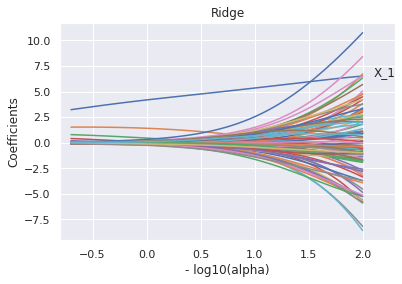

In [12]:
# @를 변환
log_alphas = -np.log10(ridge_alphas)

# 가로축을 -log10(@), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, ridge_coefs)

# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], 'X_1')

# X축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

# 축 레이블
plt.title('Ridge')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients');

- 가로축이 -log$_{10}\alpha$ 이므로 왼쪽으로 갈수록 $\alpha$가 크고, 정규화의 강도가 강하다.
- 왼쪽으로 갈수록 계수의 절대치가 작게 추정되는 경향.
- 오른쪽으로 갈수록 벌칙이 완화되어 계수의 절대치가 크게 추정되기 쉬워진다.

### 7.3.8 Ridge regression - 최적의 정규화 강도 결정
- 교차검증법을 이용, 예측 정확도를 평가해서 정확도가 가장 좋은 $\alpha$을 채택하여 모델 재구축.
- RidgeCV 함수를 사용, cv=10 이라고 지정하고 10-fold-CV를 사용해서 예측 정화도를 평가

In [13]:
# CV에서 최적의 @를 구한다.
ridge_best = linear_model.RidgeCV(cv=10, alphas=ridge_alphas, fit_intercept=False)
ridge_best.fit(X, y)

# 최적의 -log10(@)
-np.log10(ridge_best.alpha_)

0.23673469387755094

In [14]:
# 적합한 @
ridge_best.alpha_

0.5797827717179138

In [15]:
# 추정된 계수
ridge_best.coef_

array([ 4.46347121,  1.28833593,  0.2927883 , -0.09125431, -0.2013734 ,
       -0.23267945, -0.2152976 , -0.20601228, -0.14466992, -0.13546705,
       -0.15459478, -0.04558605, -0.09666078, -0.01680479, -0.1104025 ,
       -0.01170384, -0.09391876,  0.01281653, -0.01785413, -0.03092511,
        0.02491556, -0.02906365,  0.04336838, -0.08732207,  0.12740958,
        0.02104836,  0.0550757 , -0.07654728,  0.14076324, -0.00715595,
        0.09866008,  0.11620526, -0.04440412,  0.0366436 , -0.03447319,
        0.01506922,  0.12331243, -0.17131585, -0.00656963, -0.18198433,
        0.09024826,  0.22236343,  0.03531455, -0.03180034, -0.00842443,
        0.02505952,  0.33776614, -0.19347637, -0.1076738 ,  0.21161829,
       -0.12840793, -0.24597948,  0.24900423,  0.12824366, -0.15527051,
        0.27022964,  0.02951558, -0.16508783, -0.17754048,  0.15838542,
       -0.01114808,  0.0134762 ,  0.19362841,  0.13447836, -0.15575348,
       -0.01829021,  0.25569543,  0.22259035, -0.18458659,  0.00

### 7.3.9 Lasso regression - 벌칙항의 영향
lasso-path 함수로 모델 추정, 파라미터로 데이터를 지정하면 @를 다양하게 변화시킨 결과를 출력한다.

In [16]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X, y)

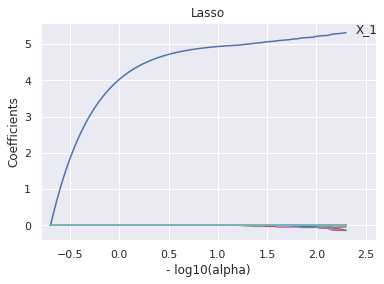

In [17]:
# @를 변환
log_alphas = -np.log10(lasso_alphas)

# 가로축을 -log10(@), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, lasso_coefs.T)

# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, lasso_coefs[0,-1], 'X_1')

# X축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

# 축 레이블
plt.title('Lasso')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients');

### 7.3.10 Lasso regression - 최적의 정규화 강도 결정

In [18]:
# 교차검증법 이용한 @ 구하기
lasso_best = linear_model.LassoCV(cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(X, y)
-np.log10(lasso_best.alpha_)

2.3010431777673266

In [19]:
# 최적의 @
lasso_best.alpha_

0.0049998482377299385

In [20]:
# 추정된 계수. 대부분의 계수가 0임, X_1의 계수가 5가 되어 올바르게 모델링했다고 볼 수 있다.
lasso_best.coef_

array([ 5.33611766e+00, -0.00000000e+00, -0.00000000e+00, -3.04284029e-01,
       -4.12051469e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

### 7.3.10 신경망은 다음 기회에.
일단은 시험준비를... ㅠㅠ\
책의 내용을 다 이해하면 좋겠는데.....\
반이라도...\
볼 수록 좀 나아져야할텐데...\
5번은 더 봐야 반은 알아 들을듯... ㅠㅠ